# How to run simulations with `arraylib` before arraying a pooled library

The starting point when generating an arrayed library is usually a pooled library which contains a mixture of mutants.
Before arraying a pooled library it can be helpful to first run a simulation to estimate how big (how many wells it contains) the arrayed library should 
be to reach a certain number of mutants with unique genes and second run a simulation to estimate how accurate the deconvolution of the combinatorially pooled arrayed library will be. 
Both simulations make use of the mutant distribution of the pooled library (i.e. how abundant each mutant is in the starting pooled library). The mutant distribution can be calculated with the `tnseeker` package and both simulations introduced here expect `tnseeker` output tables as their input.

In [1]:
import arraylib
import numpy as np

# Estimate size of arrayed library to reach a certain number of unique mutants
## Run interactively

To run the simulation interactively use the code below. 


In [2]:
# perform simulations 10 between 2000 and 5000 mutants
arrsize=np.linspace(2000, 5000,10, dtype=int)

sim_result = arraylib.simulations.simulate_unique_genes(data= "../../tests/test_data/tnseeker_test_output.csv", # path to tnseeker output file
                                            arrsize=arrsize, # arraysizes to simulate (number of mutants/wells in the array)
                                            number_of_repeats=10, # number of repeats for each simulation 
                                            gene_start=0.1, 
                                            gene_end=0.9, # gene start and end define the range in which a transposon hit is considered to be in a gene
                                            seed=42, # random seed
                                            )

In [3]:
# show output of simulation
sim_result

Arraysize   Mean       Std
2000      2000  699.8  9.431861
2333      2333  734.9  4.988988
2666      2666  753.6  6.681317
3000      3000  774.2  5.095096
3333      3333  782.5  5.064583
3666      3666  792.7  4.495553
4000      4000  798.9  1.135782
4333      4333  800.6  3.555278
4666      4666  806.1  3.269557
5000      5000  808.2   1.83303

The simulation randomly picks n mutants with probability based on the distribution in the `tnseeker` output. n is the `arrsize`, here simulations of array sizes between 2000 and 5000 were performed. Each simulation is repeated `number_of_repeats` times and the mean and standard deviation of the number of unique genes that were picked among all the picked mutants is calculated. Genes are only counted if the transposon hit it between `gene_start` and `gene_end`.
We can plot the results:

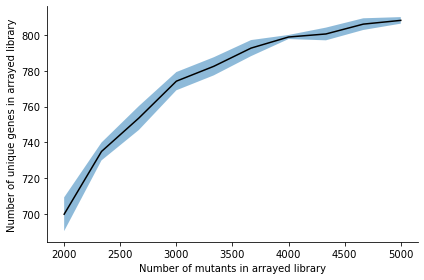

In [4]:
_ = arraylib.simulations.plot_arraysize_vs_unique_genes(sim_result)

## Run on command line

To run the simulation on the command line use:

In [5]:
!arraylib-simulate_required_arraysize ../../tests/test_data/tnseeker_test_output.csv --minsize 2000 --maxsize 5000 --number_of_simulations 10 --number_of_repeats 10 --gene_start 0.1 --gene_end 0.9 --output_filename simulation_output.csv --output_plot simulation_plots.pdf --seed 42

Simulating unique genes for arraysizes between 2000 and 5000 !
Plotting results to simulation_plots.pdf !
Saving results to simulation_output.csv !
Done!


# Estimate accuracy of library deconvolution

## Run interactively

To run the simulation interactively use the code below. This may take a few minutes.


In [6]:
sim_result = arraylib.simulations.simulate_deconvolution(data= "../../tests/test_data/tnseeker_test_output.csv", # path to tnseeker output file
                                            minsize=2, # minimum gridsize to simulate (gridsize of well plates, e.g. here a grid of wellplates of size 2x2)
                                            maxsize=4, # maximum gridsize
                                            number_of_simulations=2, # number of simulations to run, linearly spaced between minsize and maxsize (here 2 and 4)
                                            seed=42 # random seed
                                            ) 

In [7]:
# show output of simulation
sim_result

Arraysize Precision_4D Recall_4D Precision_3D Recall_3D
384        384     0.869452  0.867188     0.859375  0.859375
1536      1536     0.424384  0.414714     0.476691  0.472656

The simulation first arranges a grid 96 well plates. 
Then for each well of the grid it randomly picks mutants with replacement with probability based on the distribution in the `tnseeker` output. 
For each mutant, read counts are simulated and added to the corresponding pools of their given wells. This results in a count matrix with mutants x pools.
Then `arraylib` predicts the locations based on the read counts and calculates precision and recall for the true and predicted locations of the mutants. 
Precision is the percentage of correctly identified locations among all predicted locations. Recall is the percentage of all the true locations that were predicted.
The simulation is performed for a 3D and 4D pooling scheme.
We can plot the results using:

In [8]:
_,_ =arraylib.simulations.plot_precision_recall(sim_result) 

## Run on command line

To run the simulation on the command line use:

In [9]:
!arraylib-simulate_deconvolution ../../tests/test_data/tnseeker_test_output.csv --minsize 2 --maxsize 4 --number_of_simulations 2 --output_filename simulation_output.csv --output_plot simulation_plots.pdf --seed 42

Simulating deconvolution runs for grids of sizes ['2' '4'] !
Plotting results to precision_simulation_plots.pdf !
Plotting results to recall_simulation_plots.pdf !
Saving results to simulation_output.csv !
Done!
